In [1]:
import pickle
import numpy as np
import pandas as pd
import sys
sys.path.append('..')
import utils.utils as utils

exp = utils.Load_Experiments("../Examples/Xs.pkl")

pd.set_option('display.max_rows', None)

with open('results_5G.pkl', 'rb') as f:
    res = pickle.load(f)
print(res[0]['param'].keys())

df = pd.DataFrame([[str(np.array(res[data]['param']['X'], dtype=int)),
                        res[data]['param']['DIGESTMOD'],
                        res[data]['param']['QUALITY'],
                        res[data]['param']['PAYLOAD_SIZE_BYTE'],
                        res[data]['param']['ATTACK_PROBABILITY'],
                        np.nanmean(res[data]['goodput']), 
                        np.nanmean(res[data]['avg_verification']), 
                        np.nanmean(res[data]['latency']) - res[data]['param']['OFFSET'], 
                        np.nanmean(res[data]['frame_rate']) ] for data in res.keys()]
                        , columns=['X', 'DIGESTMOD', 'QUALITY', 'PAYLOAD_SIZE_BYTE', 'ATTACK_PROBABILITY', 'goodput', 'avg_verification', 'latency', 'frame_rate'])
df.columns
df['X'].unique()

dict_keys(['X', 'Y', 'KEY', 'DIGESTMOD', 'PAYLOAD_SIZE_BYTE', 'QUALITY', 'ATTACK_PROBABILITY', 'DURATION', 'DELAY', 'OFFSET'])


/tmp/ipykernel_7539/1167536717.py:24: RuntimeWarning: Mean of empty slice
  np.nanmean(res[data]['frame_rate']) ] for data in res.keys()]
/tmp/ipykernel_7539/1167536717.py:23: RuntimeWarning: Mean of empty slice
  np.nanmean(res[data]['latency']) - res[data]['param']['OFFSET'],


array(['[[0 0 1 0 0]\n [0 0 0 0 1]\n [1 0 0 0 0]\n [0 0 1 0 0]\n [0 0 0 0 1]\n [0 1 0 0 0]\n [1 0 0 0 0]\n [1 0 0 0 0]\n [0 0 1 0 0]\n [0 0 0 1 0]\n [0 0 0 0 1]\n [1 0 0 0 0]\n [0 0 0 1 0]\n [0 1 0 0 0]\n [0 1 0 0 0]\n [0 0 0 1 0]\n [0 1 0 0 0]\n [0 0 1 0 0]\n [0 0 0 1 0]\n [0 0 0 0 1]]',
       '[[0 0 0 0 1]\n [0 1 0 0 0]\n [0 0 0 0 1]\n [0 1 0 0 0]\n [1 0 0 0 0]\n [0 1 0 0 0]\n [0 0 0 1 0]\n [1 0 0 0 0]\n [1 0 0 0 0]\n [0 0 0 1 0]\n [0 0 1 0 0]\n [0 0 1 0 0]\n [1 0 0 0 0]\n [0 1 0 0 0]\n [0 0 1 0 0]\n [0 0 0 0 1]\n [0 0 0 1 0]\n [0 0 1 0 0]\n [0 0 0 1 0]\n [0 0 0 0 1]]',
       '[[0 1 0 0 0]\n [0 1 0 0 0]\n [1 0 0 0 0]\n [0 0 0 0 1]\n [1 0 0 0 0]\n [0 0 1 0 0]\n [0 1 0 0 0]\n [1 0 0 0 0]\n [0 0 1 0 0]\n [0 0 0 1 0]\n [0 0 0 1 0]\n [1 0 0 0 0]\n [0 0 1 0 0]\n [0 0 0 1 0]\n [0 1 0 0 0]\n [0 0 0 0 1]\n [0 0 1 0 0]\n [0 0 0 0 1]\n [0 0 0 1 0]\n [0 0 0 0 1]]',
       '[[1 1 1 1 1]\n [1 1 1 1 1]\n [1 1 1 1 1]\n [1 1 1 1 1]\n [1 1 1 1 1]\n [1 1 1 1 1]\n [1 1 1 1 1]\n [1 1 1 1 1]\n [1 1 1 1 

In [2]:
from utils import Auth

for x in df['X'].unique():

    if x == str(np.array(np.eye(20), dtype=int)):
        df['X'].replace(x, 'Trad.', inplace=True)
    if x == str(np.array(Auth.ProMAC_X(20,4), dtype=int)):
        df['X'].replace(x, 'ProMAC 4', inplace=True)
        df.update(df[df['X'] == 'ProMAC 4']['avg_verification'].apply(lambda x: x * 1/4))
    if x == str(np.array(Auth.ProMAC_X(20,3), dtype=int)):
        df['X'].replace(x, 'ProMAC 3', inplace=True)
        df.update(df[df['X'] == 'ProMAC 3']['avg_verification'].apply(lambda x: x * 1/3))
    if x == str(np.array(Auth.ProMAC_X(20,2), dtype=int)):
        df['X'].replace(x, 'ProMAC 2', inplace=True)
        df.update(df[df['X'] == 'ProMAC 2']['avg_verification'].apply(lambda x: x * 1/2))
    if x == str(np.array(Auth.X, dtype=int)):
        df['X'].replace(x, '2D MAC', inplace=True)
    if x == '[[1 0 0 0 0 0 0 0 0 0]\n [1 0 0 0 0 0 0 0 0 0]\n [1 0 0 0 0 0 0 0 0 0]\n [0 1 0 0 0 0 0 0 0 0]\n [0 1 0 0 0 0 0 0 0 0]\n [0 1 0 0 0 0 0 0 0 0]\n [0 0 1 0 0 0 0 0 0 0]\n [0 0 1 0 0 0 0 0 0 0]\n [0 0 1 0 0 0 0 0 0 0]\n [0 0 0 1 0 0 0 0 0 0]\n [0 0 0 1 0 0 0 0 0 0]\n [0 0 0 1 0 0 0 0 0 0]\n [0 0 0 0 1 0 0 0 0 0]\n [0 0 0 0 1 0 0 0 0 0]\n [0 0 0 0 1 0 0 0 0 0]\n [0 0 0 0 0 1 0 0 0 0]\n [0 0 0 0 0 1 0 0 0 0]\n [0 0 0 0 0 1 0 0 0 0]\n [0 0 0 0 0 0 1 0 0 0]\n [0 0 0 0 0 0 1 0 0 0]\n [0 0 0 0 0 0 1 0 0 0]\n [0 0 0 0 0 0 0 1 0 0]\n [0 0 0 0 0 0 0 1 0 0]\n [0 0 0 0 0 0 0 1 0 0]\n [0 0 0 0 0 0 0 0 1 0]\n [0 0 0 0 0 0 0 0 1 0]\n [0 0 0 0 0 0 0 0 1 0]\n [0 0 0 0 0 0 0 0 0 1]\n [0 0 0 0 0 0 0 0 0 1]\n [0 0 0 0 0 0 0 0 0 1]]':
        df['X'].replace(x, 'Agg MAC', inplace=True)
    if x == str(np.eye(30, dtype=int)):
        df['X'].replace(x, 'Trad. 30', inplace=True)

for x in df['X'].unique():
    for e in exp:
        if x in str(np.array(exp[e]['results']['X'], dtype=int)):
            df['X'].replace(x, str(np.round(1-exp[e]['parameters']['p'],2)) + " optimal, " + f"m_nr: {exp[e]['parameters']['m_nr']}, t_nr: {exp[e]['parameters']['t_nr']}, L: {exp[e]['eval']['average_L']}, SN: {len(exp[e]['eval']['rows_that_breaks_the_verification'])}", inplace=True) 
            # print(exp[e]['eval']['rows_that_breaks_the_verification'], exp[e]['eval']['average_L'] )

# remove the test case
df = df[df['X']!='Trad. 30']

# remove any rows with df['X'] value of str(np.array(np.eye(10), dtype=int)
# df = df[df['X'] != str(np.array(np.eye(10), dtype=int))]

# select only the attack probability bigger than .05

# df = df[df['ATTACK_PROBABILITY'] > .05]    


# average of avg-verification, goodput, latency, frame_rate for each X categorized by ATTACK_PROBABILITY, PAYLOAD_SIZE_BYTE, DIGESTMOD
                
# multiply the avg_verification with the DigestMOD int value
df['avg_verification'] = df['avg_verification'] * df['DIGESTMOD'].apply(lambda x: int(x[-3:]) if x != 'sha1' else 128)
df = df[df['PAYLOAD_SIZE_BYTE'] <128]



df['optimal'] = df['X'].apply(lambda x: float(x.split(',')[0].split(' ')[0]) if 'optimal' in x else -1)
df['m_nr'] = df['X'].apply(lambda x: int(x.split(',')[1].split(' ')[2]) if 'optimal' in x else 30)
df['t_nr'] = df['X'].apply(lambda x: int(x.split(',')[2].split(' ')[2]) if 'optimal' in x else 30)


df['L'] = df['X'].apply(lambda x: float(x.split(',')[3].split(' ')[2]) if 'optimal' in x else 0)
df['SN'] = df['X'].apply(lambda x: float(x.split(',')[4].split(' ')[2]) if 'optimal' in x else 0)
df['SN'] = df['SN'].apply(lambda x: 30 if x == 0 else x)
df['SN'].where(df['X'] != 'Agg MAC', 10, inplace=True)
df['SN'] = (df['SN']/df['m_nr'])*25


df['t_nr'] = np.concatenate([df["Agg MAC"  != df['X']]['t_nr'] ,df["Agg MAC"  == df['X']]['t_nr'].apply(lambda x: 10)])
# df['t_nr'].where(df['X'] == '1D MAC', 10, inplace=True)
df['ratio'] = df['t_nr']/df['m_nr']

df_classic = df[df['X'].isin(['Trad.', '2D MAC', 'Agg MAC', 'ProMAC 4', 'ProMAC 3', 'ProMAC 2'])].copy()
df_classic

df_optimal_in_attack_0_01 = df[df['ATTACK_PROBABILITY'] < .1].copy()
df_optimal_in_attack_0_01 = df_optimal_in_attack_0_01[df['X'].apply(lambda x: 'optimal' in x)]
df_optimal_in_attack_0_01


M = df['PAYLOAD_SIZE_BYTE'].unique()[0]*8
T = 32*8 if df['DIGESTMOD'].unique()[0] == "sha256" else 64*8
maxGoodput = M/(M+T)

df = df[df['optimal'] == df['ATTACK_PROBABILITY']]
df = df[df['ATTACK_PROBABILITY'] > .01]
df = pd.concat([df, df_classic])

df

/tmp/ipykernel_7539/2164507934.py:68: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_optimal_in_attack_0_01 = df_optimal_in_attack_0_01[df['X'].apply(lambda x: 'optimal' in x)]


,X,DIGESTMOD,QUALITY,PAYLOAD_SIZE_BYTE,ATTACK_PROBABILITY,goodput,avg_verification,latency,frame_rate,optimal,m_nr,t_nr,L,SN,ratio
8,"0.2 optimal, m_nr: 20, t_nr: 5, L: 6.3, SN: 5",sha512,10,96,0.20,0.407040,233.497465,-0.593244,1.444444,0.2,20,5,6.300000,6.250000,0.250000
14,"0.3 optimal, m_nr: 20, t_nr: 5, L: 6.1, SN: 5",sha512,10,96,0.30,0.286876,149.757551,-0.104830,1.166667,0.3,20,5,6.100000,6.250000,0.250000
27,"0.1 optimal, m_nr: 20, t_nr: 5, L: 7.55, SN: 3",sha512,10,96,0.10,0.554732,479.182842,6.127090,5.120000,0.1,20,5,7.550000,3.750000,0.250000
48,"0.2 optimal, m_nr: 20, t_nr: 10, L: 5.95, SN: 5",sha512,10,96,0.20,0.501030,466.578370,15.555560,1.500000,0.2,20,10,5.950000,6.250000,0.500000
52,"0.1 optimal, m_nr: 20, t_nr: 10, L: 7.15, SN: 2",sha512,10,96,0.10,0.527351,1047.644034,-2.780339,6.370370,0.1,20,10,7.150000,2.500000,0.500000
59,"0.3 optimal, m_nr: 20, t_nr: 10, L: 3.3, SN: 10",sha512,10,96,0.30,0.483583,266.791234,0.029789,1.333333,0.3,20,10,3.300000,12.500000,0.500000
73,"0.2 optimal, m_nr: 20, t_nr: 15, L: 4.15, SN: 6",sha512,10,96,0.20,0.505193,709.941692,12.792197,4.000000,0.2,20,15,4.150000,7.500000,0.750000
79,"0.3 optimal, m_nr: 20, t_nr: 15, L: 4.95, SN: 5",sha512,10,96,0.30,0.434025,439.395556,8.386782,2.428571,0.3,20,15,4.950000,6.250000,0.750000
82,"0.1 optimal, m_nr: 20, t_nr: 15, L: 5.15, SN: 3",sha512,10,96,0.10,0.519909,1538.897696,4.678997,9.111111,0.1,20,15,5.150000,3.750000,0.750000
98,"0.2 optimal, m_nr: 30, t_nr: 5, L: 8.9, SN: 5",sha512,10,96,0.20,0.264960,133.924543,-0.038548,1.000000,0.2,30,5,8.900000,4.166667,0.166667


0.2


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


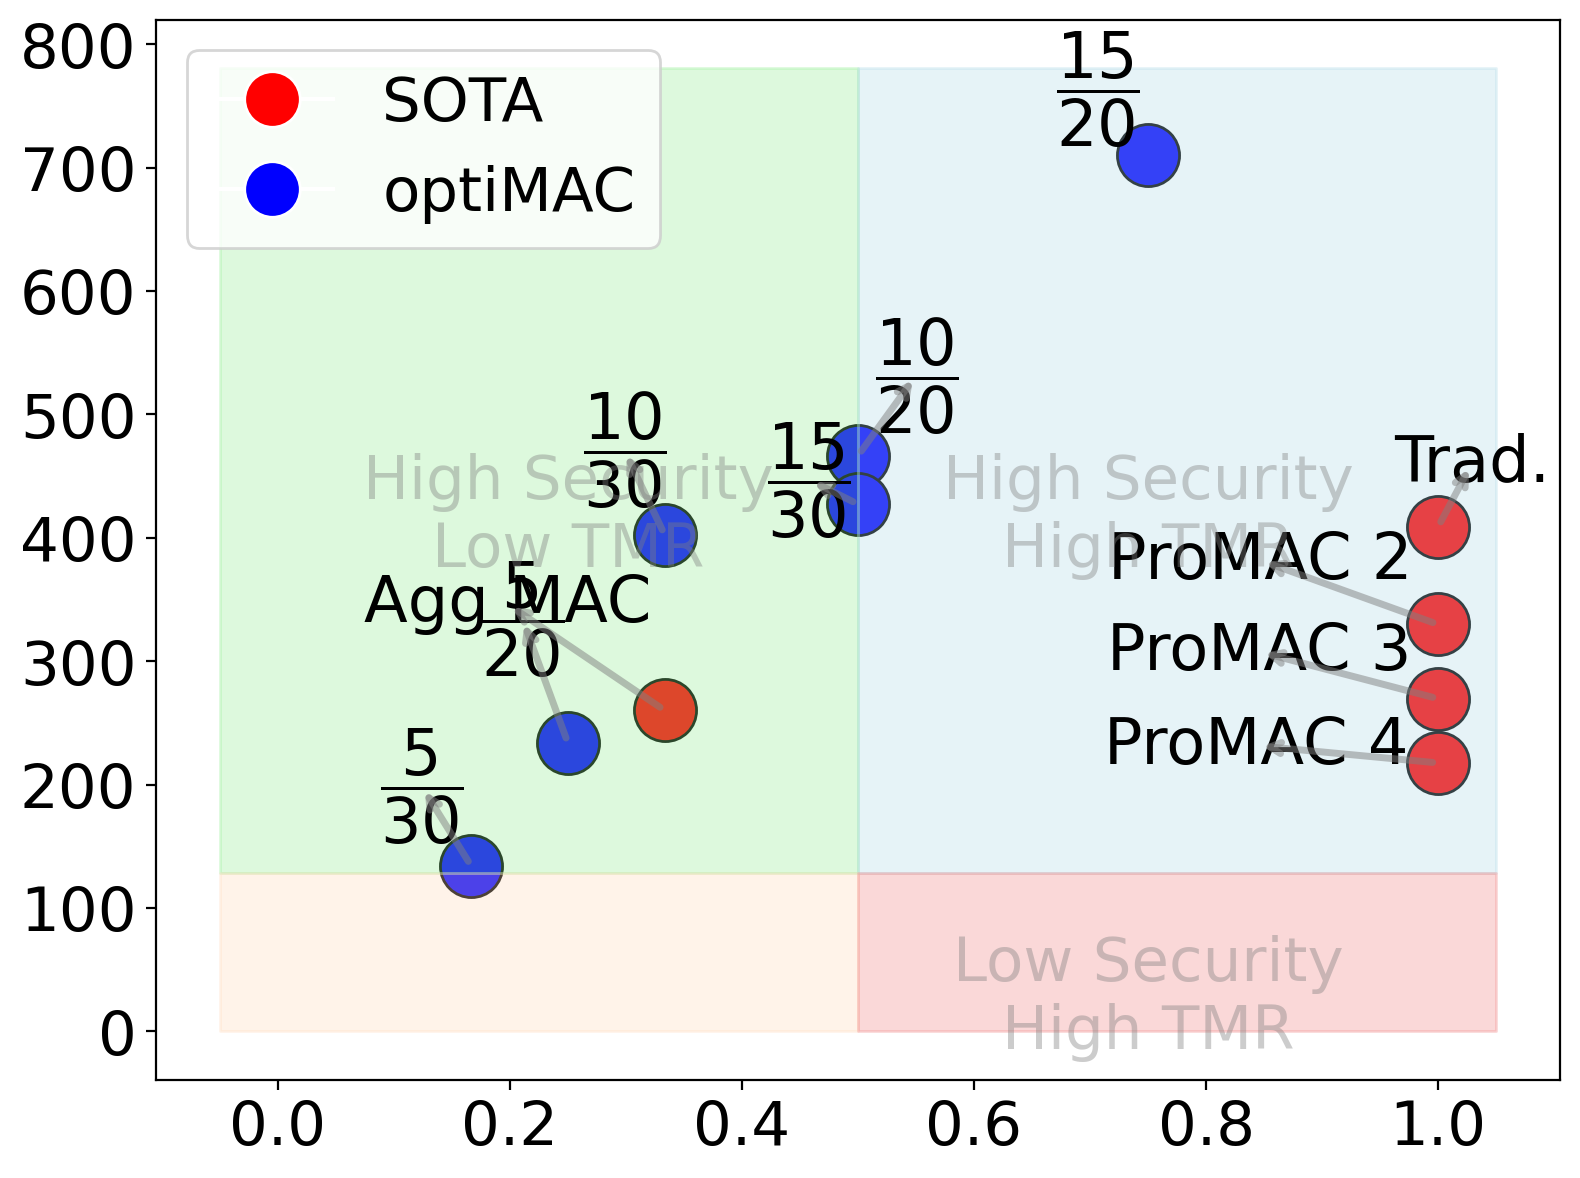

0.3


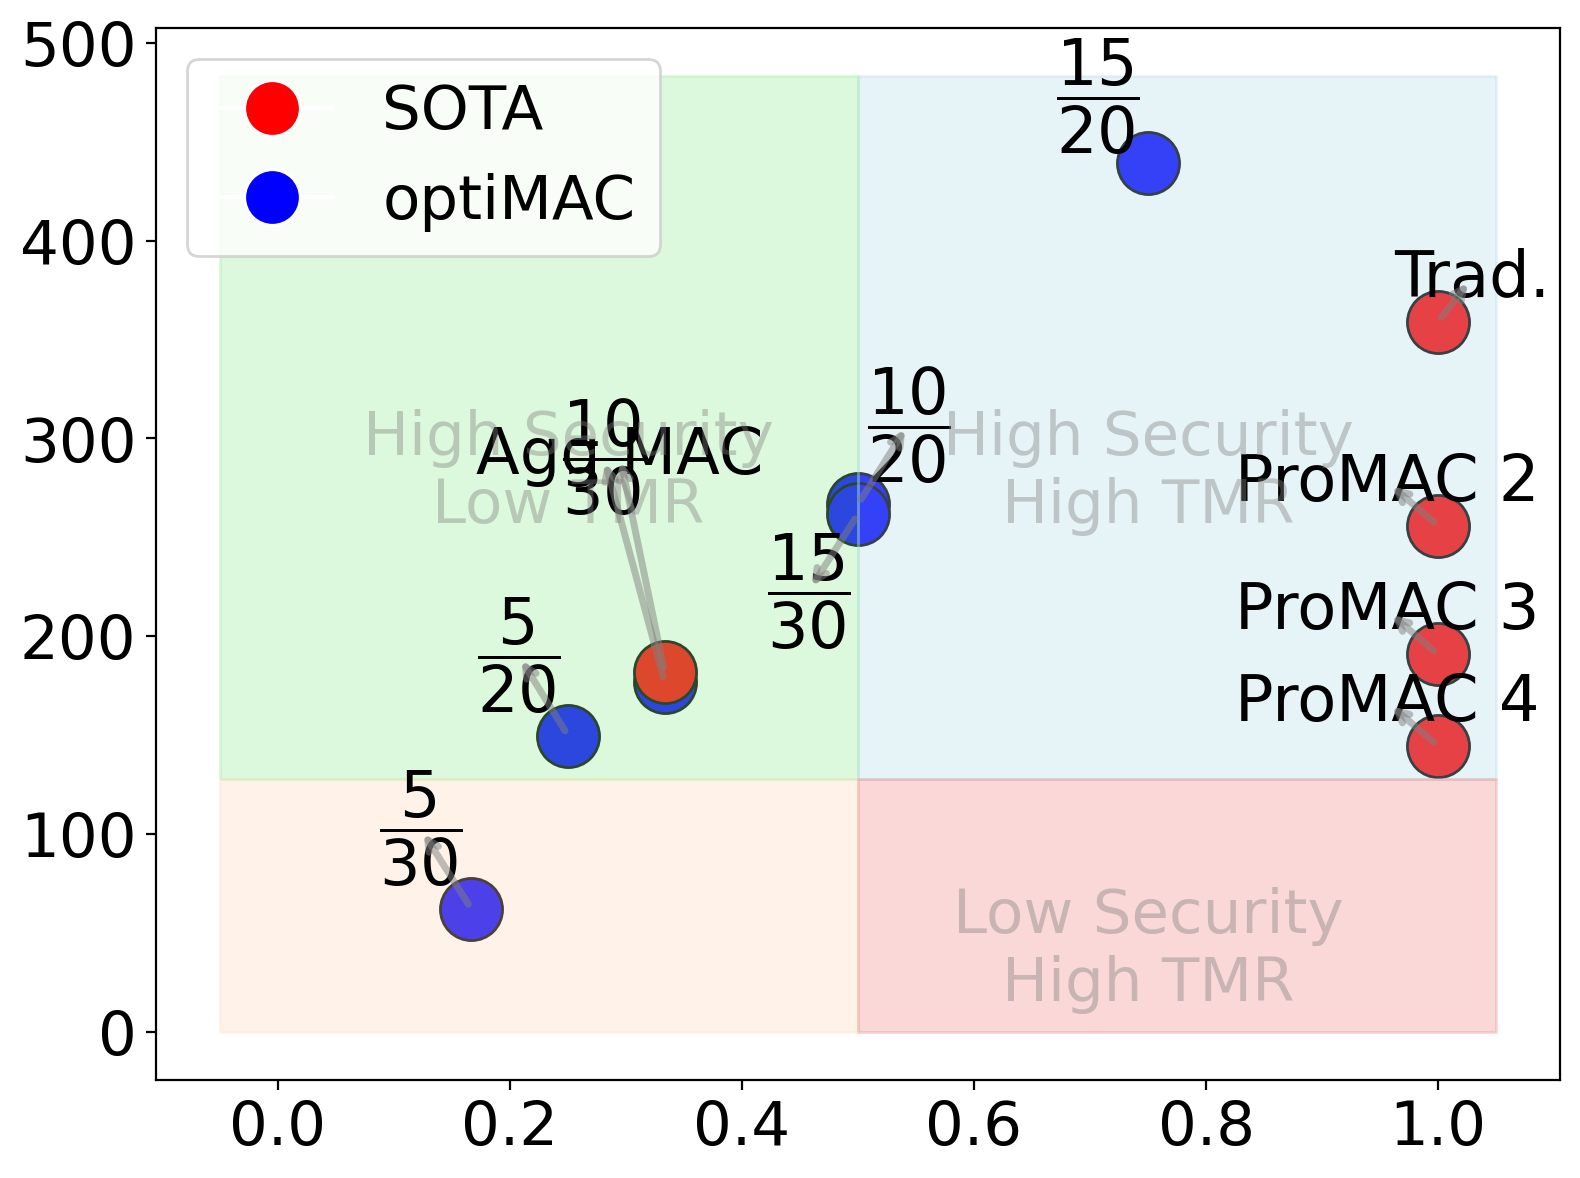

0.1


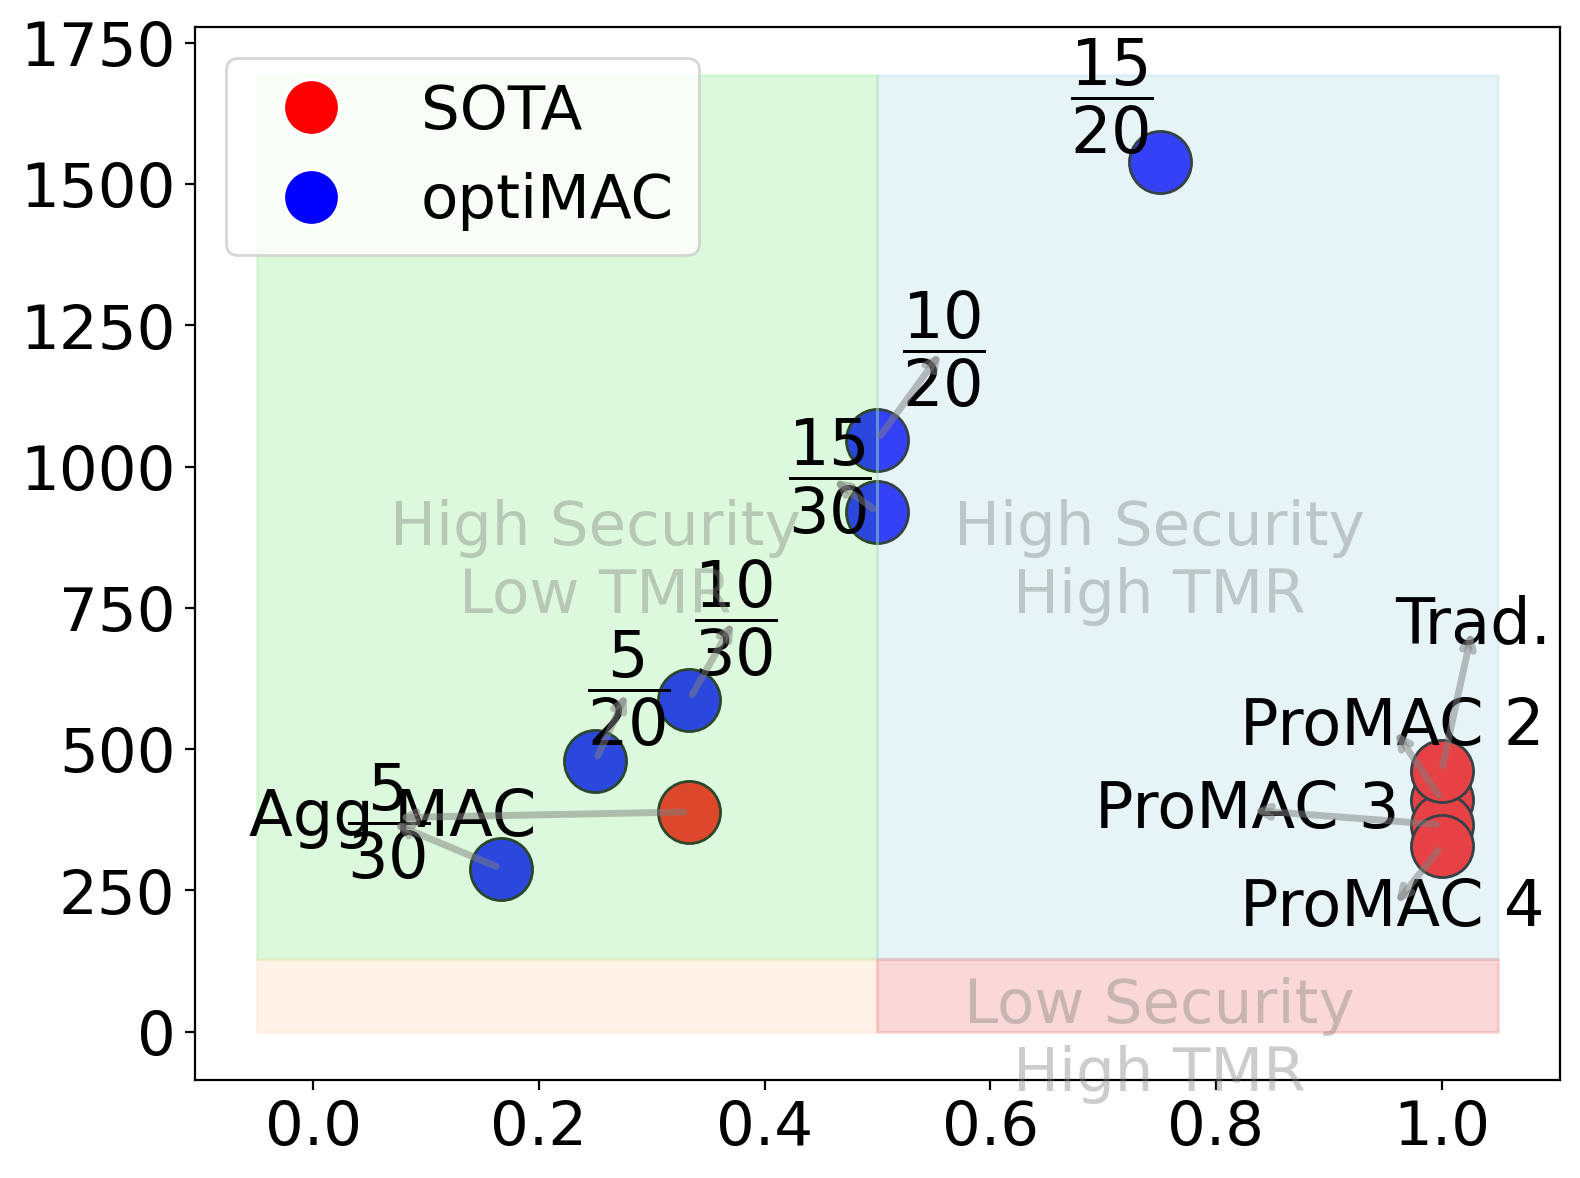

In [3]:
import matplotlib.pyplot as plt
from adjustText import adjust_text  # Import adjust_text for label adjustments

# Get unique attack rates
unique_attack_rates = df['ATTACK_PROBABILITY'].unique()

# Loop through each unique attack rate and create a separate plot
for attack_rate in unique_attack_rates:
    if attack_rate < .02:
        continue
    print(attack_rate)
    subset = df[df['ATTACK_PROBABILITY'] == attack_rate]
    
    # Extract relevant columns for this subset
    message_to_tag_ratio = subset['ratio']
    security_bits_per_message = subset['avg_verification']
    method_names = subset['X']

    # Determine dynamic ranges for background regions based on the data
    security_min = 0
    security_max = 1.1 * security_bits_per_message.max()
    mid_security = 128

    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(8, 6), dpi=200)

    # Collect all text labels for adjust_text
    texts = []

    # Plot data points with annotations for method names
    for x, y, label in zip(message_to_tag_ratio, security_bits_per_message, method_names):
        color = 'blue' if "optimal" in label else 'red'
        ax.scatter(x, y, color=color, s=500, edgecolor='black')
        
        # Process label format
        # label = '\n'.join(label.split(',')[1:]) if 'optimal' in label else label
        label = r"$\dfrac{"+label.split(',')[2].split(':')[1]+"}{"+label.split(',')[1].split(':')[1]+r"}$"  if 'optimal' in label else label    

        text = ax.text(x, y, label, fontsize=23, ha='right', va='bottom')
        texts.append(text)  # Append each text to the texts list for adjustment

    # Set axis labels and title
    # ax.set_xlabel(r'Message to Tag Ratio $\left(\frac{t}{m}\right)$', fontsize=14)
    # ax.set_ylabel('Security (tag bits per message)', fontsize=14)
    # ax.set_title(f'Attack Rate: {attack_rate}', fontsize=16)

    # Define dynamically-scaled background colors
    ax.fill_between([-0.05, 0.5], mid_security, security_max, color='lightgreen', alpha=0.3)
    ax.fill_between([0.5, 1.05], mid_security, security_max, color='lightblue', alpha=0.3)
    ax.fill_between([-0.05, 0.5], security_min, mid_security, color='peachpuff', alpha=0.3)
    ax.fill_between([0.5, 1.05], security_min, mid_security, color='lightcoral', alpha=0.3)

    # Add region labels dynamically based on scaled values
    ax.text(0.25, mid_security + (security_max - mid_security) / 2 - security_max*.1, 'High Security\nLow TMR', color='gray', ha='center', fontsize=22, alpha=0.4)
    ax.text(0.75, mid_security + (security_max - mid_security) / 2 - security_max*.1 , 'High Security\nHigh TMR', color='gray', ha='center', fontsize=22, alpha=0.4)
    # ax.text(0.25, security_min + (mid_security - security_min) / 2 - security_max*.1, 'Low Security\nLow TMR', color='gray', ha='center', fontsize=22, alpha=0.4)
    ax.text(0.75, security_min + (mid_security - security_min) / 2 - security_max*.1, 'Low Security\nHigh TMR', color='gray', ha='center', fontsize=22, alpha=0.4)

    # Add legend for 'SOTA' and 'Proposed' with colors
    legend_labels = {'SOTA': 'red', 'optiMAC': 'blue'}
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=20, label=label) 
                      for label, color in legend_labels.items()]
    ax.legend(handles=legend_handles, fontsize=22, loc = 'upper left')

    # Adjust text to prevent overlapping
    adjust_text(texts, arrowprops=dict(arrowstyle='<-', color='grey', lw=2.5, alpha = .5),precision=0.901)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.tight_layout()
    plt.savefig(f'{attack_rate}S\'.png')
    plt.show()



768 512
0.2


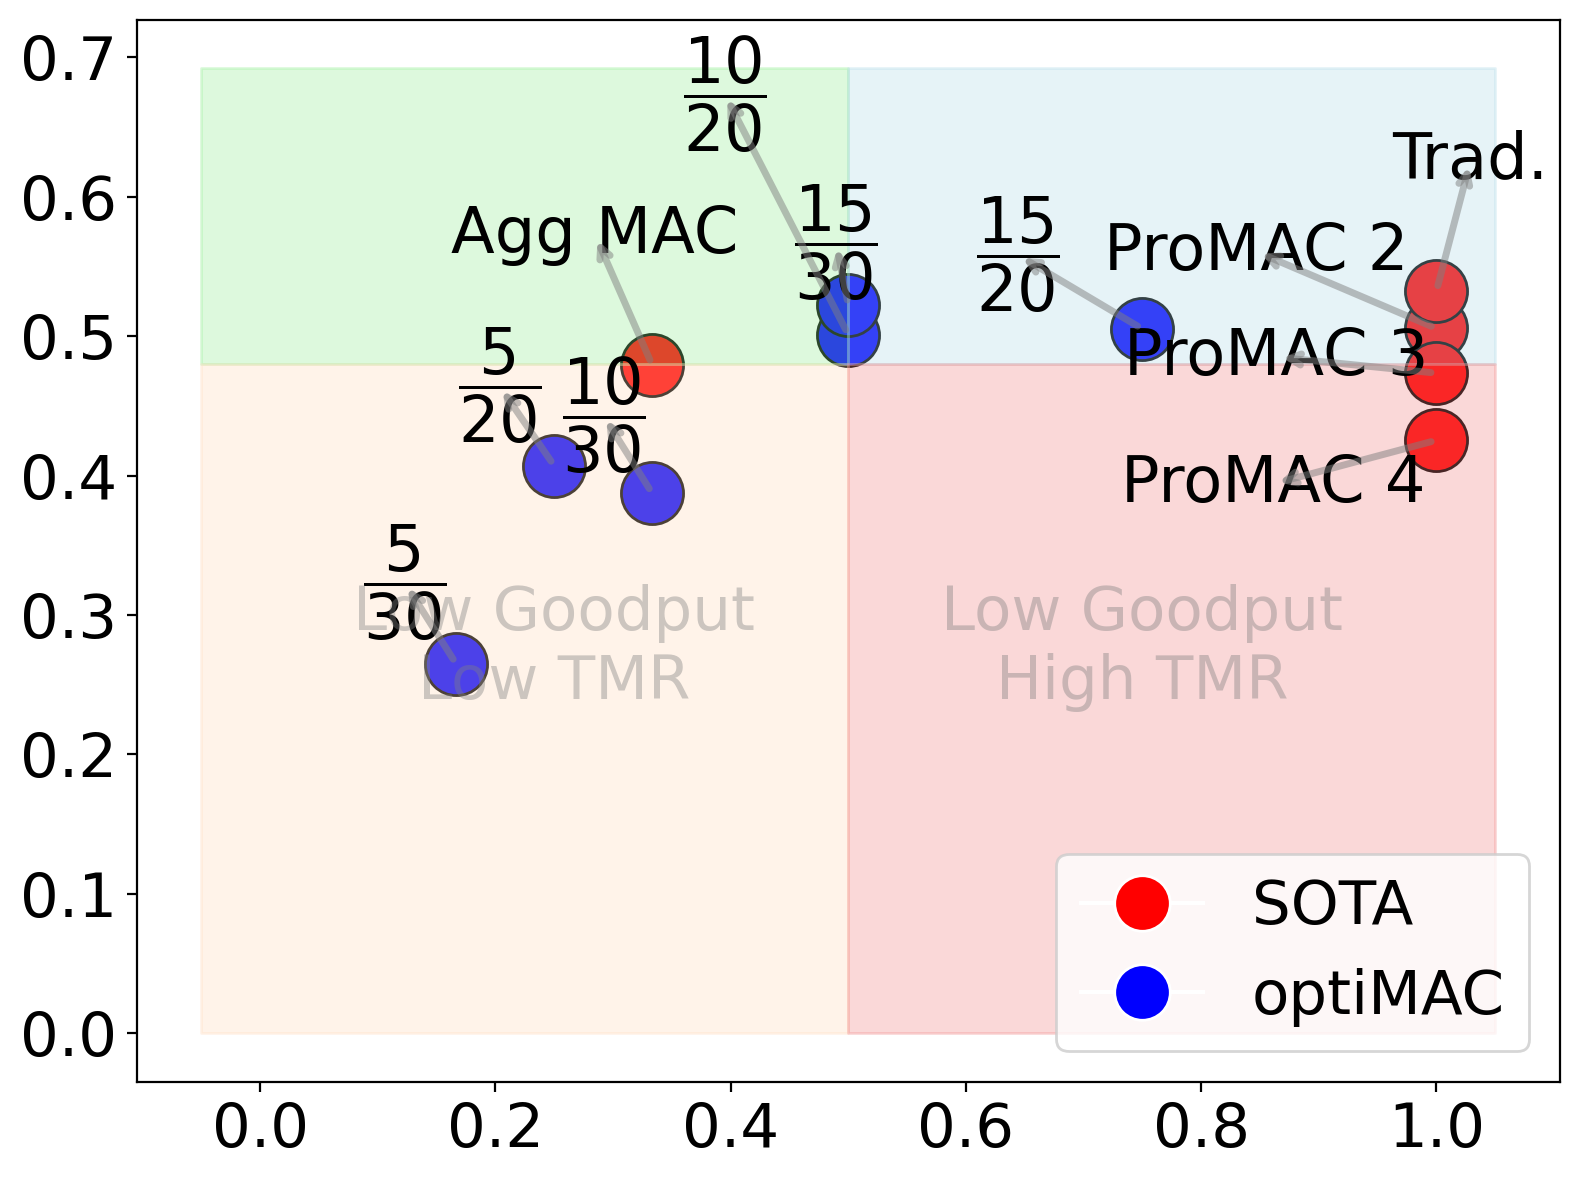

0.3


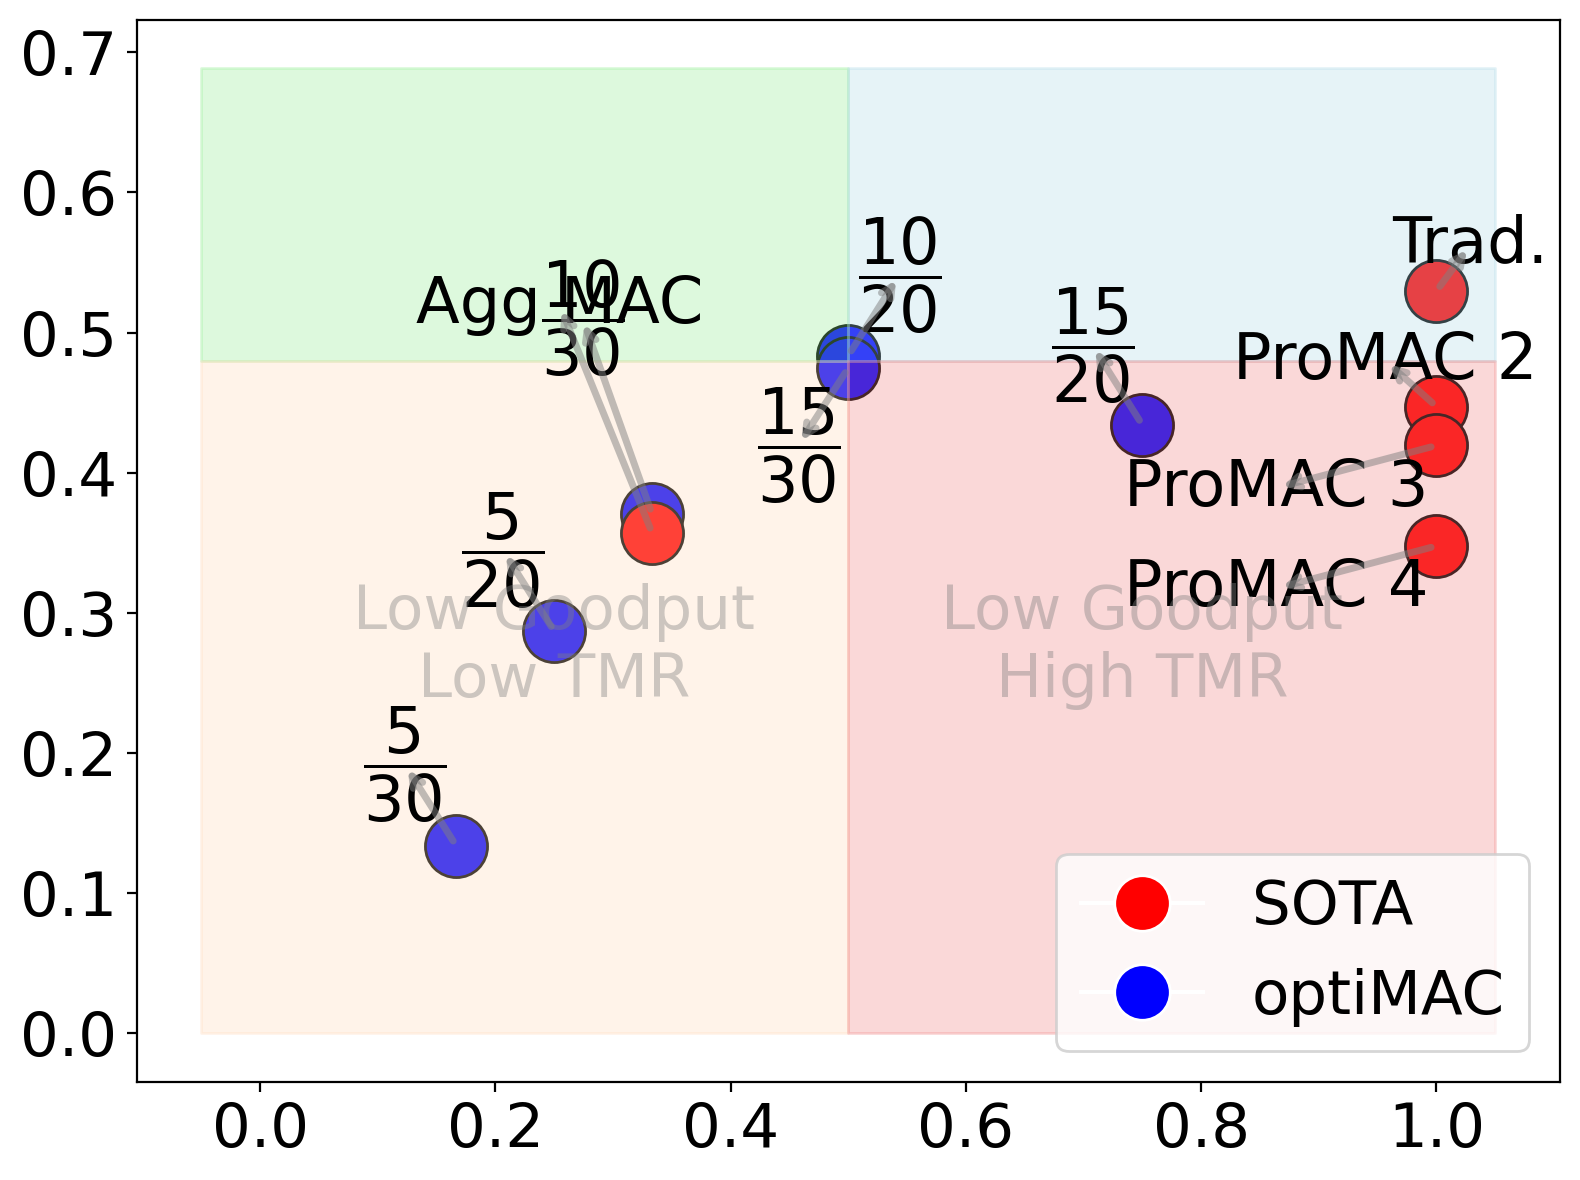

0.1


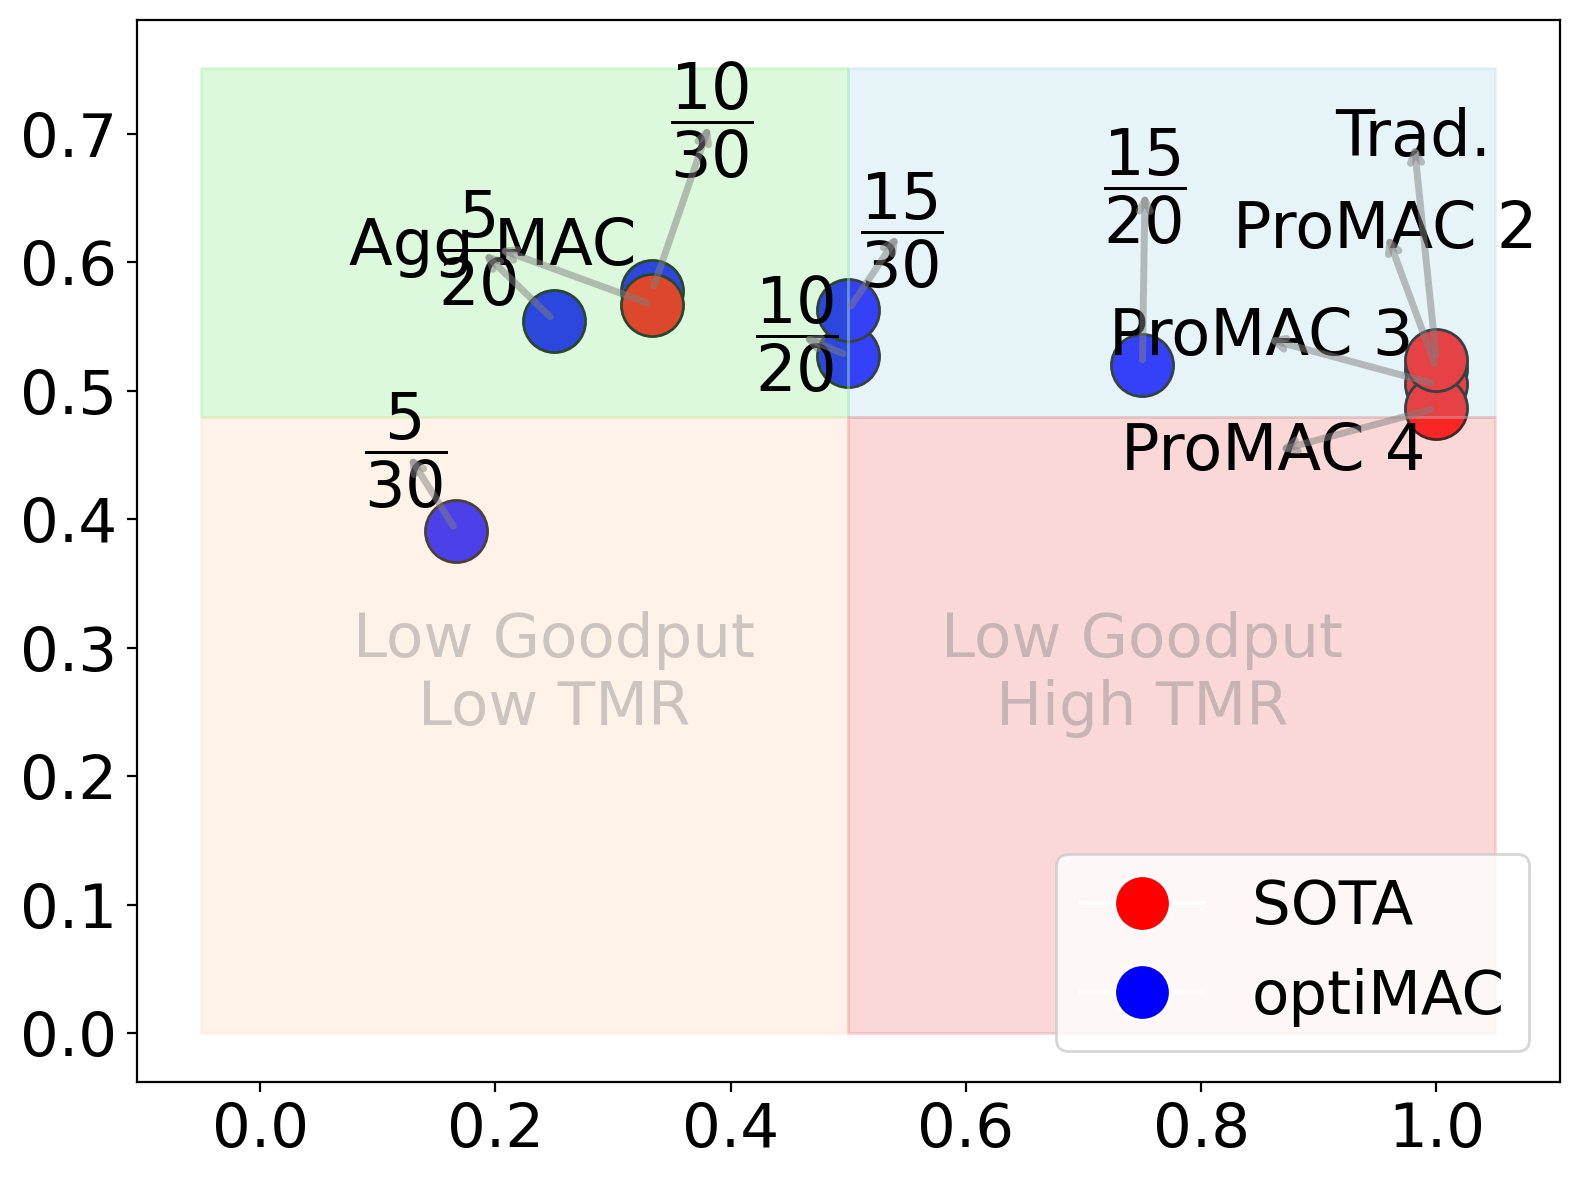

In [4]:




print(M, T)
# Loop through each unique attack rate and create a separate plot
for attack_rate in unique_attack_rates:
    if attack_rate < .02:
        continue
    print(attack_rate)
    subset = df[df['ATTACK_PROBABILITY'] == attack_rate]
    
    # Extract relevant columns for this subset
    message_to_tag_ratio = subset['ratio']
    goodput = subset['goodput']
    method_names = subset['X']

    # Determine dynamic ranges for background regions based on the data
    goodput_min = 0
    goodput_max = goodput.max() * 1.3
    mid_goodput = .8* maxGoodput

    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(8, 6), dpi=200)

    # Collect all text labels for adjust_text
    texts = []

    # Plot data points with annotations for method names
    for x, y, label in zip(message_to_tag_ratio, goodput, method_names):
        color = 'blue' if "optimal" in label else 'red'
        ax.scatter(x, y, color=color, s=500, edgecolor='black')
        
        # Process label format
        # label = '\n'.join(label.split(',')[1:]) if 'optimal' in label else label
        label = r"$\dfrac{"+label.split(',')[2].split(':')[1]+"}{"+label.split(',')[1].split(':')[1]+r"}$"  if 'optimal' in label else label    

        text = ax.text(x, y, label, fontsize=23, ha='right', va='bottom')
        texts.append(text)  # Append each text to the texts list for adjustment

    # Set axis labels and title
    # ax.set_xlabel(r'Message to Tag Ratio $\left(\frac{t}{m}\right)$', fontsize=14)
    # ax.set_ylabel('Security (tag bits per message)', fontsize=14)
    # ax.set_title(f'Attack Rate: {attack_rate}', fontsize=16)

    # Define dynamically-scaled background colors
    ax.fill_between([-0.05, 0.5], mid_goodput, goodput_max, color='lightgreen', alpha=0.3)
    ax.fill_between([0.5, 1.05], mid_goodput, goodput_max, color='lightblue', alpha=0.3)
    ax.fill_between([-0.05, 0.5], goodput_min, mid_goodput, color='peachpuff', alpha=0.3)
    ax.fill_between([0.5, 1.05], goodput_min, mid_goodput, color='lightcoral', alpha=0.3)

    # Add region labels dynamically based on scaled values
    # ax.text(0.25, mid_security + (goodput_max - mid_goodput) / 2, 'High Goodput\nLow TMR', color='gray', ha='center', fontsize=22, alpha=0.4)
    # ax.text(0.75, mid_security + (goodput_max - mid_goodput) / 2, 'High Goodput\nHigh TMR', color='gray', ha='center', fontsize=22, alpha=0.4)
    ax.text(0.25, goodput_min + (mid_goodput - goodput_min) / 2, 'Low Goodput\nLow TMR', color='gray', ha='center', fontsize=22, alpha=0.4)
    ax.text(0.75, goodput_min + (mid_goodput - goodput_min) / 2, 'Low Goodput\nHigh TMR', color='gray', ha='center', fontsize=22, alpha=0.4)

    # Add legend for 'SOTA' and 'Proposed' with colors
    legend_labels = {'SOTA': 'red', 'optiMAC': 'blue'}
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=20, label=label) 
                      for label, color in legend_labels.items()]
    ax.legend(handles=legend_handles, fontsize=22, loc = 'lower right')

    # Adjust text to prevent overlapping
    adjust_text(texts, arrowprops=dict(arrowstyle='<-', color='grey', lw=2.5, alpha = 0.5), precision=0.901)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.tight_layout()
    plt.savefig(f'{attack_rate}G\'.png')
    plt.show()



0.2


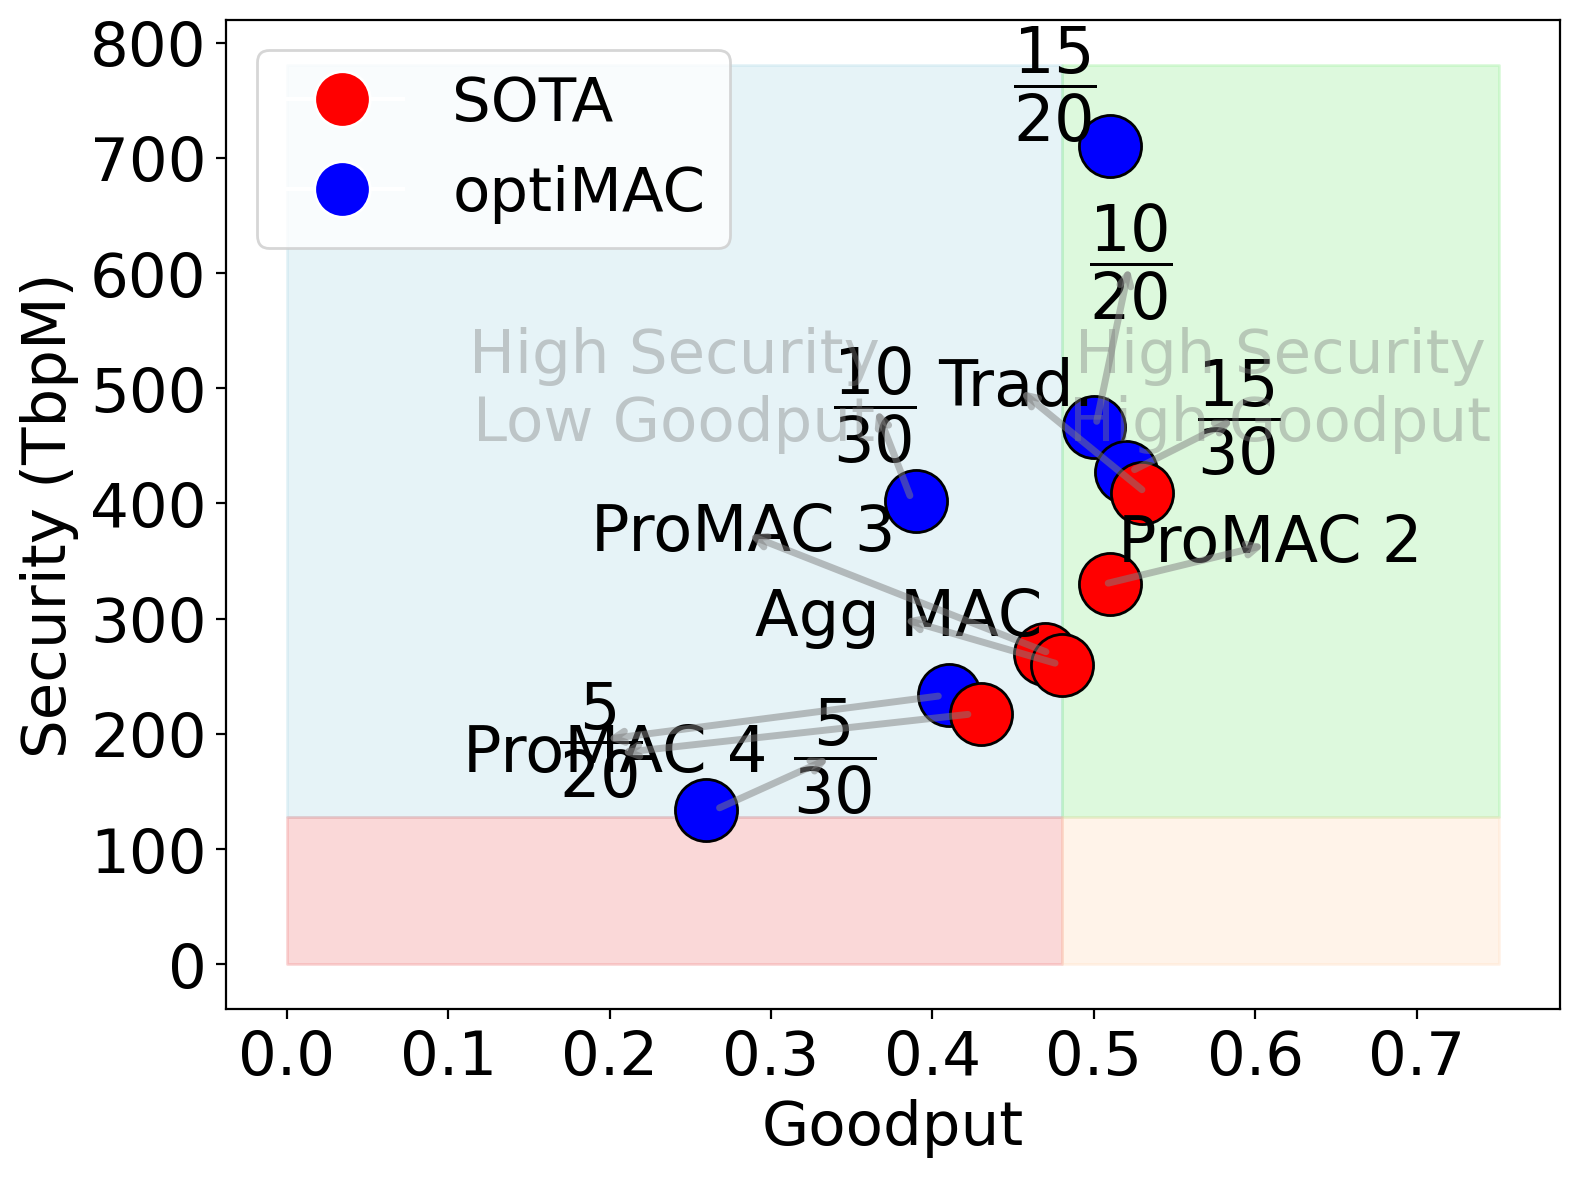

0.3


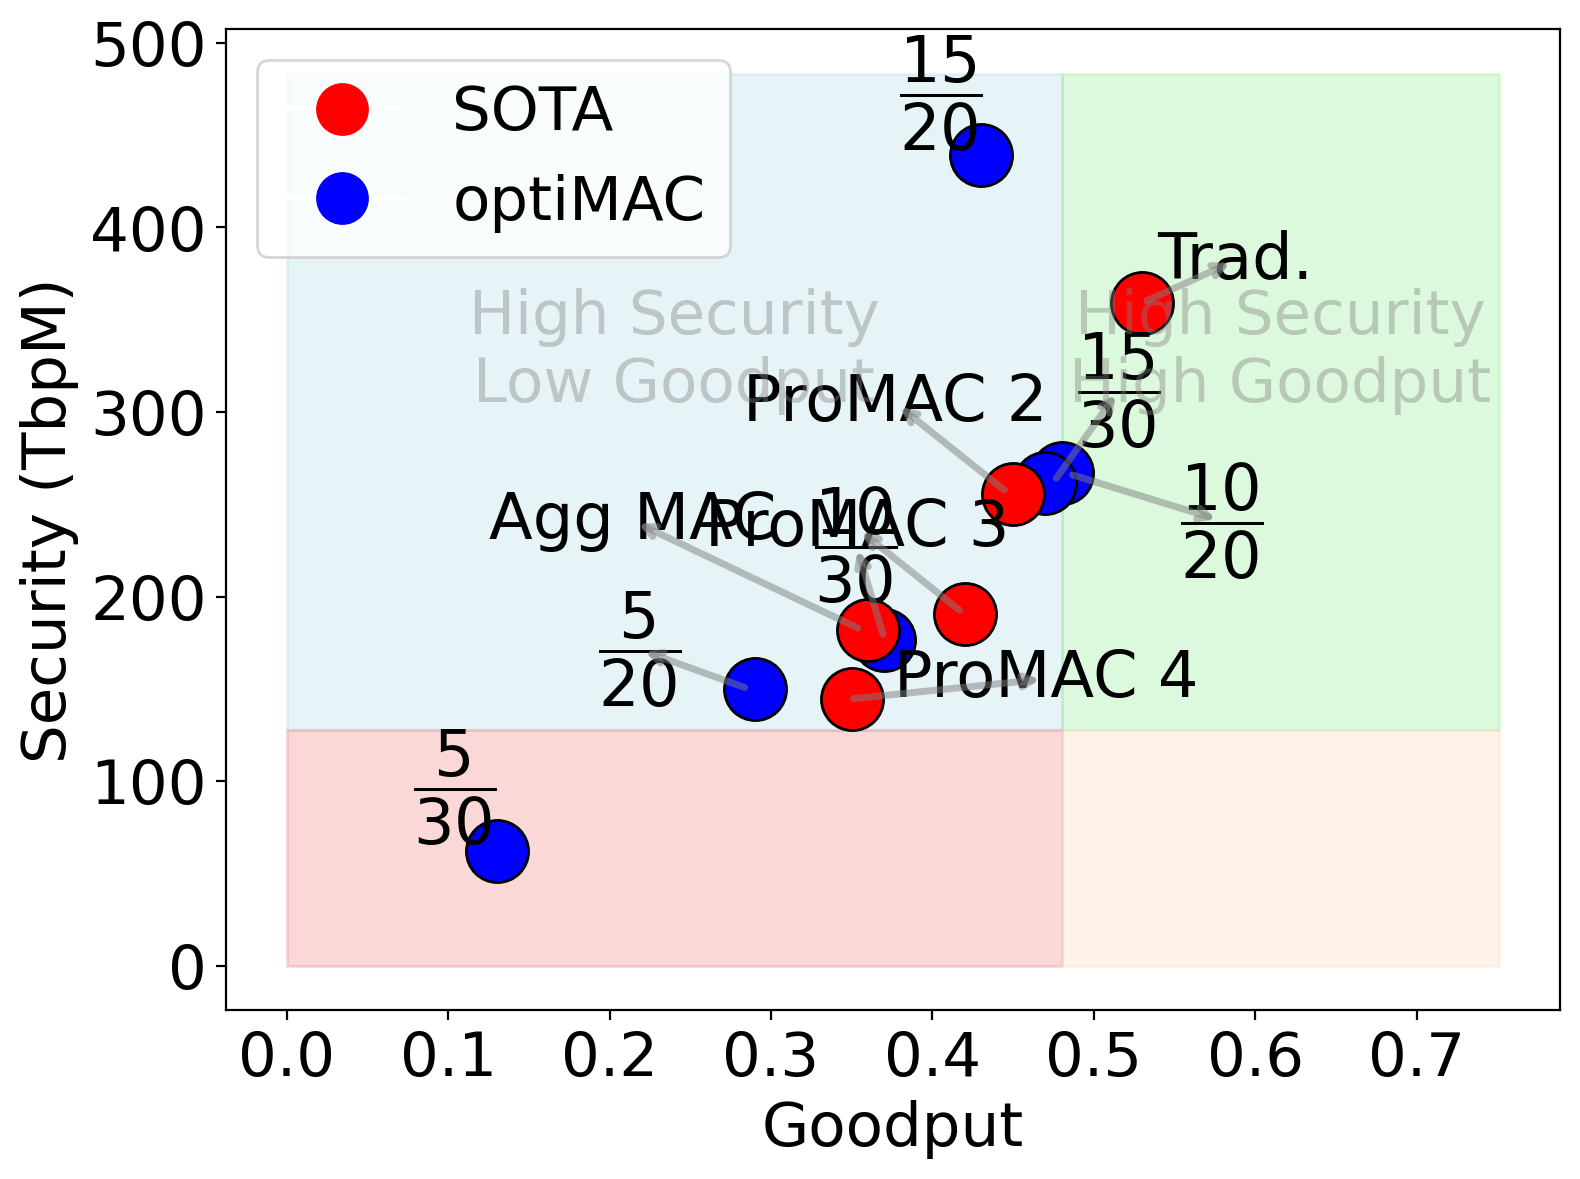

0.1


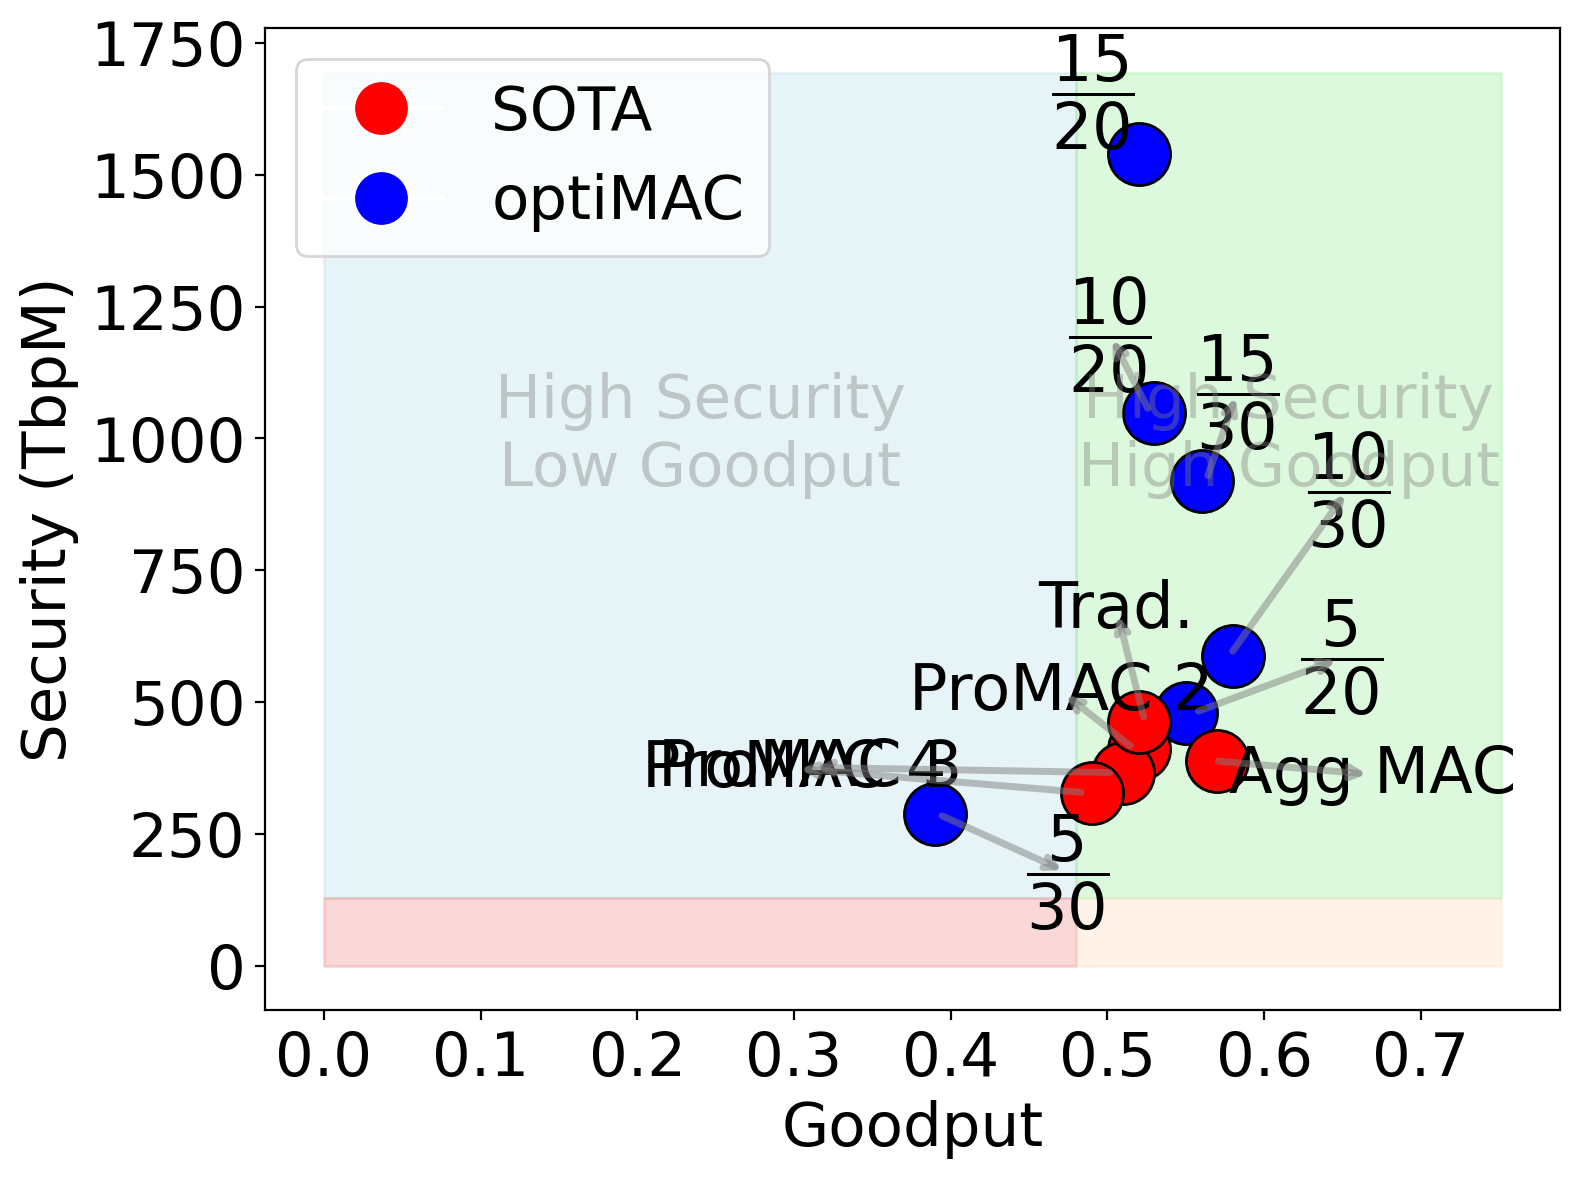

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text
import matplotlib.cm as cm

# Loop through each unique attack rate and create a separate plot
for attack_rate in unique_attack_rates:
    if attack_rate < .02:
        continue
    print(attack_rate)
    subset = df[df['ATTACK_PROBABILITY'] == attack_rate]
    
    # Extract relevant columns for this subset
    goodput = subset['goodput']
    security_bits_per_message = subset['avg_verification']
    method_names = subset['X']
    ratio = subset['ratio']

    # Determine dynamic ranges for background regions based on the data
    # security_min = security_bits_per_message.min() - 0.1 * security_bits_per_message.min()
    security_max = security_bits_per_message.max() * 1.1 
    # mid_security = (security_max + security_min) / 2

    # goodput_min = goodput.min() - 0.1 * goodput.min()
    # goodput_max = goodput.max() + 0.1 * goodput.max()
    # mid_goodput = (goodput_max + goodput_min) / 2
    

    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(8, 6), dpi=200)


    ax.fill_between([goodput_min, mid_goodput], mid_security, security_max, color='lightblue', alpha=0.3)
    ax.fill_between([mid_goodput, goodput_max], mid_security, security_max, color='lightgreen', alpha=0.3)
    ax.fill_between([goodput_min, mid_goodput], security_min, mid_security, color='lightcoral', alpha=0.3)
    ax.fill_between([mid_goodput, goodput_max], security_min, mid_security, color='peachpuff', alpha=0.3)

    # Collect all text labels for adjust_text
    texts = []

    # Normalize goodput for color mapping
    norm = plt.Normalize(ratio.min(), ratio.max())
    cmap_SOTA = cm.Reds  # Choose a colormap, such as 'viridis'
    cmap_Optimal = cm.Blues  # Choose a colormap, such as 'viridis'

    # Plot data points with annotations for method names
    cnt = 0
    for x, y, label in zip(goodput, security_bits_per_message, method_names):
        color_sota = cmap_SOTA(norm(ratio))   # Map ratio to color
        color_optimal = cmap_Optimal(norm(ratio))
        if "optimal" in label:
            ax.scatter(np.round(x, 2), y, color='blue', s=500, edgecolor='black')
        else:
            ax.scatter(np.round(x, 2), y, color='red', s=500, edgecolor='black')
        # ax.scatter(np.round(x, 2), y, color=color[cnt], s=500, edgecolor='black')
        cnt+=1
        # Process label format
        label = r"$\dfrac{"+label.split(',')[2].split(':')[1]+"}{"+label.split(',')[1].split(':')[1]+r"}$"  if 'optimal' in label else label    
        text = ax.text(x, y, label, fontsize=23, ha='right', va='bottom')
        texts.append(text)  # Append each text to the texts list for adjustment

    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{float(np.round(x,2))}'))

    # Set axis labels and title
    ax.set_xlabel(r'Goodput', fontsize=22)

    ax.set_ylabel('Security (TbpM)', fontsize=22)
    # ax.set_title(f'Attack Rate: {attack_rate}', fontsize=16)

    # Define dynamically-scaled background colors

    # Add region labels dynamically based on scaled values
    ax.text(goodput_min + (mid_goodput - goodput_min) / 2, mid_security + (security_max - mid_security) / 2, 
            'High Security\nLow Goodput', color='gray', ha='center', fontsize=22, alpha=0.4)
    ax.text(mid_goodput + (goodput_max - mid_goodput) / 2, mid_security + (security_max - mid_security) / 2, 
            'High Security\nHigh Goodput', color='gray', ha='center', fontsize=22, alpha=0.4)
    # ax.text(goodput_min + (mid_goodput - goodput_min) / 2, security_min + (mid_security - security_min) / 2, 
    #         'Low Security\nLow Goodput', color='gray', ha='center', fontsize=22, alpha=0.4)

    # Add color legend for goodput using colorbar
    # sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    # sm.set_array([])
    # cbar = fig.colorbar(sm, ax=ax,, orientation='vertical', pad=0.1)
    # cbar.set_label('Tag to message ratio', fontsize=22)
    legend_labels = {'SOTA': 'red', 'optiMAC': 'blue'}
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=20, label=label) 
                      for label, color in legend_labels.items()]
    ax.legend(handles=legend_handles, fontsize=22, loc = 'upper left')

    # Adjust text to prevent overlapping
    adjust_text(texts, arrowprops=dict(arrowstyle='<-', color='grey', lw=2.5, alpha = .5), precision=0.901)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.tight_layout()
    plt.savefig(f'{attack_rate}SG.png')
    plt.show()


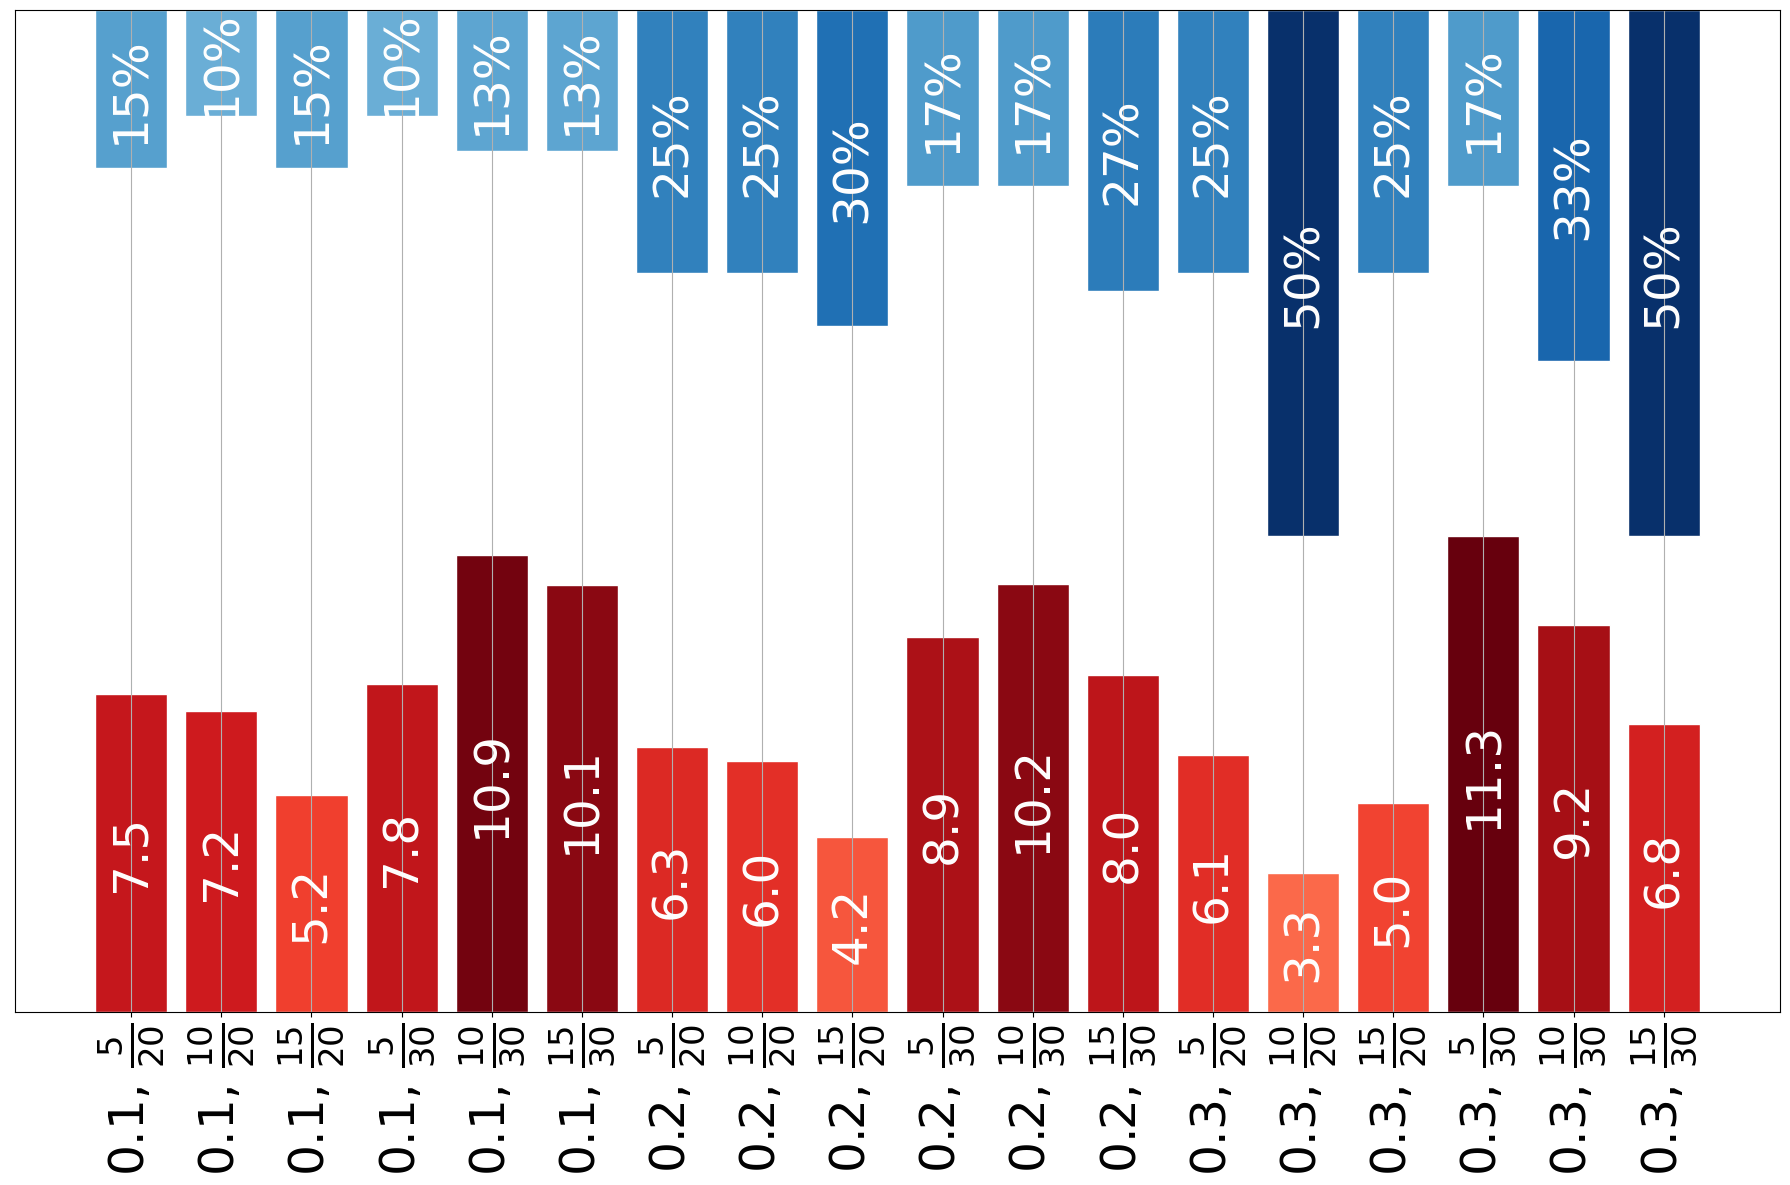

In [6]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.colors as mcolors

def fun(x):
    try: 
        return x.split(',')[0].split(' ')[0] + r", $\frac{" + rf"{x.split(',')[2].split(' ')[-1]}" + r"}{" + rf"{x.split(',')[1].split(' ')[-1]}" + r"}$"
    except:
        if 'Trad.' in x:
            return r'trad, $\frac{30}{30}$'
        if 'ProMAC 4' in x:
            return r'proMAC 4, $\frac{30}{30}$'
        if 'ProMAC 3' in x:
            return r'ProMAC 3, $\frac{30}{30}$'
        if 'ProMAC 2' in x:
            return r'ProMAC 2, $\frac{30}{30}$'

        if 'Agg MAC' in x:
            return r'Agg AMC 3 $\frac{10}{30}$'



df = df[['X','L','SN','t_nr','m_nr','optimal','ratio']][0:18]

# Ensure L and SN are numeric and format X for grouping
df['L'] = pd.to_numeric(df['L'], errors='coerce')
df['SN'] = pd.to_numeric(df['SN'], errors='coerce')

df['X'] = df['X'].apply(fun)

# Sort by 'optimal', 'm_nr', and 'ratio'
df.sort_values(by=['optimal', 'm_nr', 'ratio'], inplace=True)

# Normalize L and SN separately for color mapping based on values
norm_L = plt.Normalize(df['L'].min(), df['L'].max())
norm_SN = plt.Normalize(df['SN'].min(), df['SN'].max())

# Define max height for SN bars to start from the top
max_y = df['L'].max() + df['SN'].max()

# Insert empty rows to separate attack rates if needed
unique_attack_rates = df['X'].unique()
spaced_df = pd.DataFrame()

# Plot
fig, ax = plt.subplots(figsize=(18, 12))

for i, scheme in enumerate(df['X'].unique()):
    scheme_data = df[df['X'] == scheme]
    
    if scheme_data.empty or scheme == '':
        continue  # Skip empty bars for spacing
    
    # Determine color based on normalized value for each bar within the 0.5 to 1 range of the colormap
    color_L = cm.Reds(0.5 + 0.5 * norm_L(scheme_data['L'].iloc[0]))
    color_SN = cm.Blues(0.5 + 0.5 * norm_SN(scheme_data['SN'].iloc[0]))
    
    # Plot L from the bottom with red gradient based on its value
    bars_L = ax.bar(scheme_data['X'], scheme_data['L'], color=color_L, edgecolor='white', linewidth=1)
    
    # Plot SN starting from the top with blue gradient based on its value
    bars_SN = ax.bar(scheme_data['X'], scheme_data['SN'], bottom=max_y - scheme_data['SN'], color=color_SN, edgecolor='white', linewidth=1)
    
    # Add vertical text on bars for L and SN
    for bar in bars_L:
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            bar.get_height() / 2, 
            f"{bar.get_height():.1f}", 
            ha="center", 
            va="center", 
            color="white", 
            fontsize=35, 
            rotation=90
        )
        
    for bar in bars_SN:
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            max_y - bar.get_height() + bar.get_height() / 2, 
            f"{bar.get_height()*4:.0f}%", 
            ha="center", 
            va="center", 
            color="white", 
            fontsize=35, 
            rotation=90
        )

# Remove y-ticks
ax.yaxis.set_ticks([])

# Customize plot with labels for top and bottom sections
ax.set_ylim(0, max_y)  # Set y-axis limit to max height
# ax.annotate("Latency\n(lower better)", xy=(0.46, 0.36), xycoords='axes fraction', ha='center', fontsize=35, color="darkred")
# ax.annotate("Strength Number\n(higher better)", xy=(0.46, 0.67), xycoords='axes fraction', ha='center', fontsize=35, color="darkblue")

# Rotate x-ticks and increase font size
plt.xticks(rotation=90, fontsize=35, )

# Add color bars for L and SN on each side based on value normalization, using the upper half of the colormap
# sm_L = plt.cm.ScalarMappable(cmap=cm.Reds, norm=norm_L)
# sm_L.set_array([])
# cbar_L = fig.colorbar(sm_L, ax=ax, orientation="vertical", pad=0.02, fraction=0.05)
# cbar_L.set_label("Latency (L)", fontsize=16)
# cbar_L.set_ticks([df['L'].min(), df['L'].max()])  # Only show the min and max ticks

# sm_SN = plt.cm.ScalarMappable(cmap=cm.Blues, norm=norm_SN)
# sm_SN.set_array([])
# cbar_SN = fig.colorbar(sm_SN, ax=ax, orientation="vertical", pad=0.02, fraction=0.05)
# cbar_SN.set_label("Strength Number (SN)", fontsize=16)
# cbar_SN.set_ticks([df['SN'].min(), df['SN'].max()])  # Only show the min and max ticks

plt.tight_layout()
plt.grid(True)
plt.show()
